In [351]:
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from mlxtend.frequent_patterns import apriori, association_rules

In [352]:
data_train = pd.read_csv("/Users/erwinqodariyah/Documents/SEMESTER_3/Data Mining/praktikum-2-data-mining-rka/train.csv")
data_test = pd.read_csv("/Users/erwinqodariyah/Documents/SEMESTER_3/Data Mining/praktikum-2-data-mining-rka/test.csv")

In [353]:
data_train.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,0,8.605141,4.759242,0,Low,0,0,1,0,1,0,0,Education,1
1,0,1,8.487654,5.785164,1,High,0,1,0,1,1,0,0,Education,1
2,1,1,7.782498,5.067122,0,High,1,0,1,1,1,0,1,IT,1
3,0,1,6.691559,2.132398,0,Medium,1,1,0,0,0,1,1,Education,1
4,0,1,9.573909,3.102280,0,Medium,0,0,1,0,1,0,1,Healthcare,1


In [354]:
min_values = data_train[['Hours_Worked_Per_Day', 'Meetings_Per_Day']].min()
max_values = data_train[['Hours_Worked_Per_Day', 'Meetings_Per_Day']].max()

print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

Minimum values:
Hours_Worked_Per_Day    0.287249
Meetings_Per_Day       -2.698406
dtype: float64

Maximum values:
Hours_Worked_Per_Day    16.958169
Meetings_Per_Day         9.537437
dtype: float64


In [355]:
def categorize_work_hours(hours):
    if hours <= 4:
        return "Sangat Pendek"
    elif hours <= 6:
        return "Pendek"
    elif hours <= 8:
        return "Normal"
    elif hours <= 12:
        return "Lembur"
    else:
        return "Sangat Lama"

# Terapkan fungsi pada kolom
data_train['Hours_Worked_Per_Day'] = data_train['Hours_Worked_Per_Day'].apply(categorize_work_hours)
data_train.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,0,Lembur,4.759242,0,Low,0,0,1,0,1,0,0,Education,1
1,0,1,Lembur,5.785164,1,High,0,1,0,1,1,0,0,Education,1
2,1,1,Normal,5.067122,0,High,1,0,1,1,1,0,1,IT,1
3,0,1,Normal,2.132398,0,Medium,1,1,0,0,0,1,1,Education,1
4,0,1,Lembur,3.102280,0,Medium,0,0,1,0,1,0,1,Healthcare,1


In [356]:
# Fungsi untuk membuat kategori
def categorize_meetings(meetings):
    if meetings <= 0:
        return "Tidak Ada Rapat"
    elif meetings <= 2:
        return "Rapat Sedikit"
    elif meetings <= 5:
        return "Rapat Sedang"
    elif meetings <= 8:
        return "Rapat Banyak"
    else:
        return "Rapat Sangat Banyak"

# Terapkan fungsi pada kolom
data_train['Meetings_Per_Day'] = data_train['Meetings_Per_Day'].apply(categorize_meetings)
data_train.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,0,Lembur,Rapat Sedang,0,Low,0,0,1,0,1,0,0,Education,1
1,0,1,Lembur,Rapat Banyak,1,High,0,1,0,1,1,0,0,Education,1
2,1,1,Normal,Rapat Banyak,0,High,1,0,1,1,1,0,1,IT,1
3,0,1,Normal,Rapat Sedang,0,Medium,1,1,0,0,0,1,1,Education,1
4,0,1,Lembur,Rapat Sedang,0,Medium,0,0,1,0,1,0,1,Healthcare,1


In [357]:
# Membuat salinan data_train agar perubahan tidak mempengaruhi data asli
data_train_converted = data_train.copy()

In [358]:
ordinal_encoder = OrdinalEncoder(categories=[['Tidak Ada Rapat','Rapat Sedikit', 'Rapat Sedang', 'Rapat Banyak', 'Rapat Sangat Banyak']])
data_train['Meetings_Per_Day_OrdinalEncode'] = ordinal_encoder.fit_transform(data_train[['Meetings_Per_Day']])

In [359]:
ordinal_encoder = OrdinalEncoder(categories=[['Sangat Pendek', 'Pendek', 'Normal','Lembur','Sangat Lama']])
data_train['Hours_Worked_Per_Day_OrdinalEncode'] = ordinal_encoder.fit_transform(data_train[['Hours_Worked_Per_Day']])

In [360]:
# Assuming 'Stress_Level' is the column you want to encode
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
data_train['Stress_Level_OrdinaEncode'] = ordinal_encoder.fit_transform(data_train[['Stress_Level']])

In [361]:
label_encoder = LabelEncoder()

# Fit dan transform kolom 'Sector'
data_train['Sector_Endcode'] = label_encoder.fit_transform(data_train['Sector'])

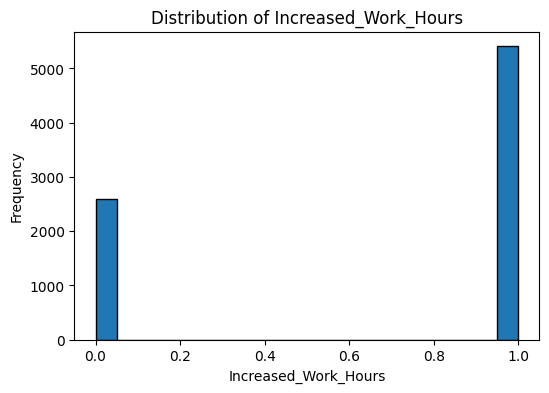

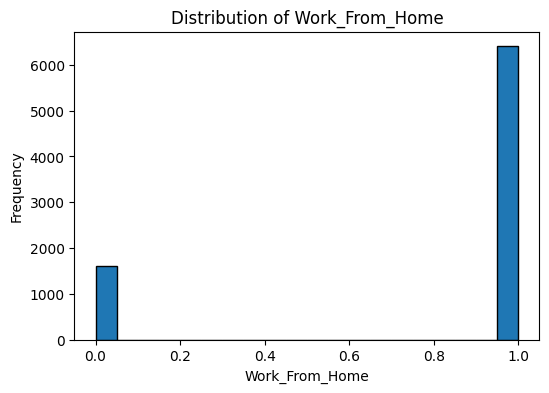

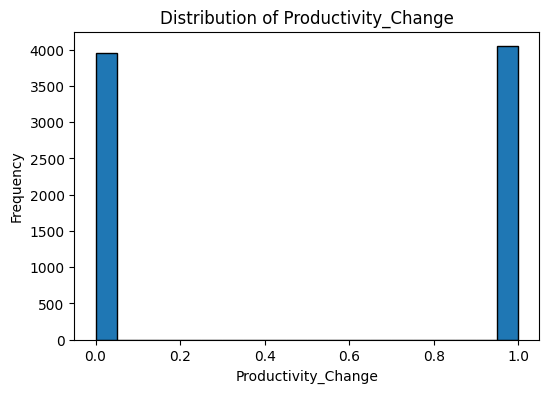

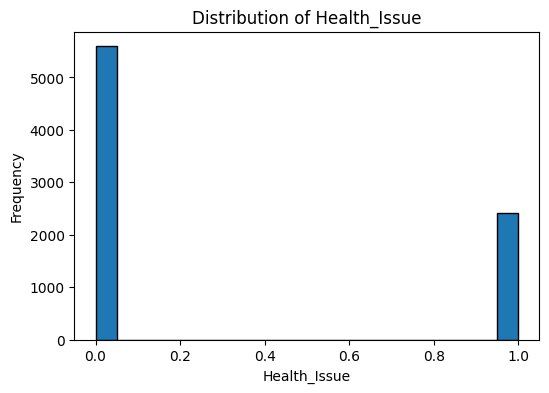

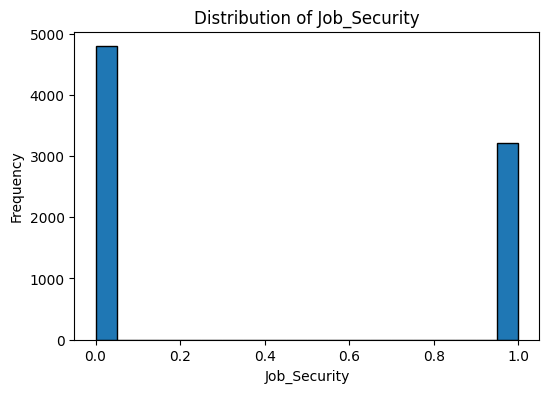

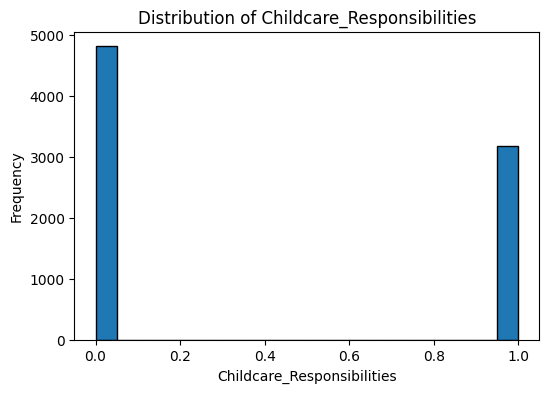

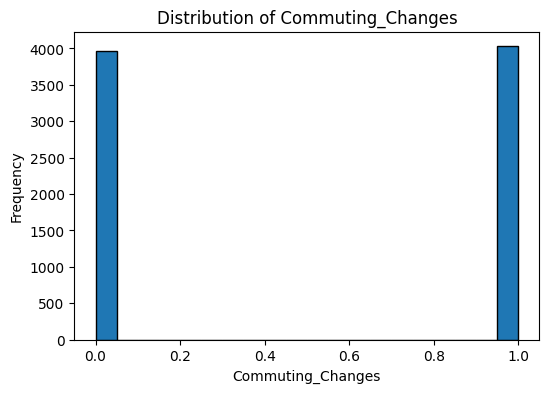

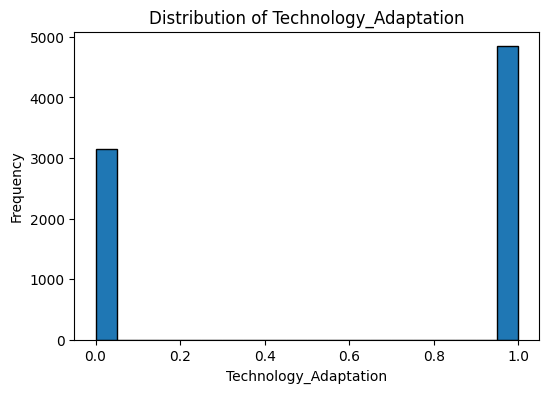

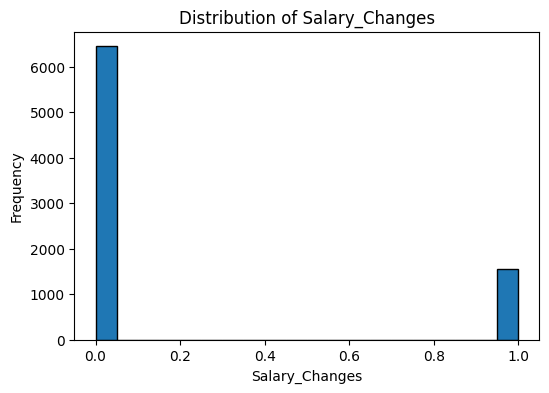

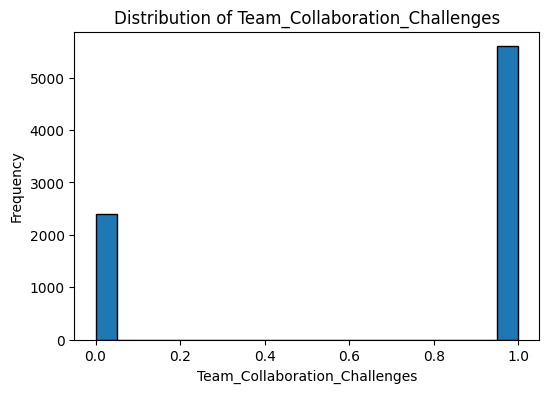

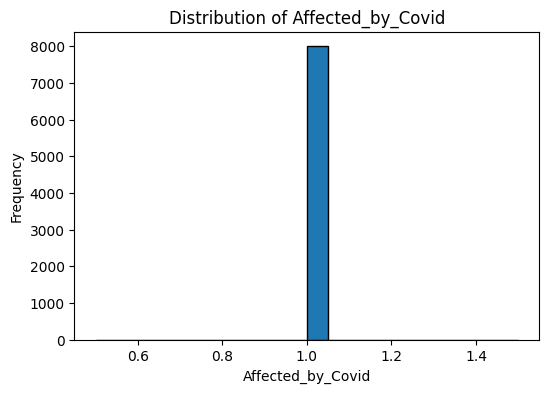

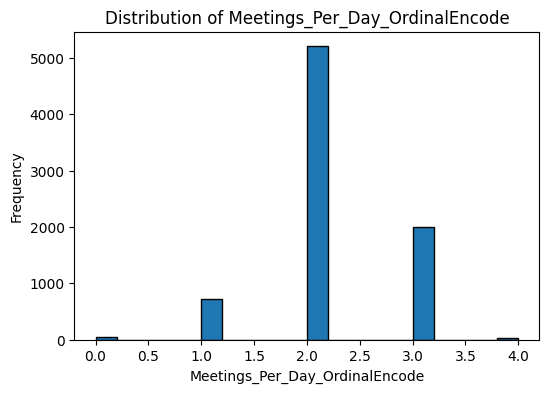

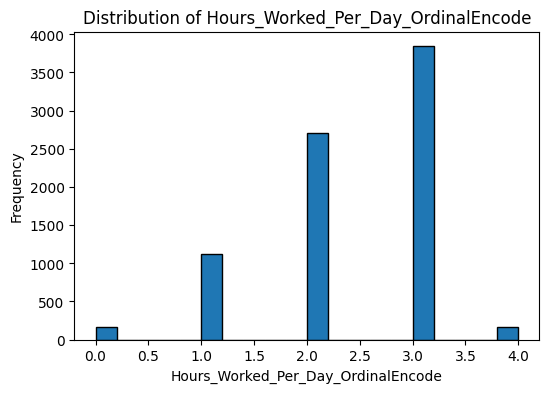

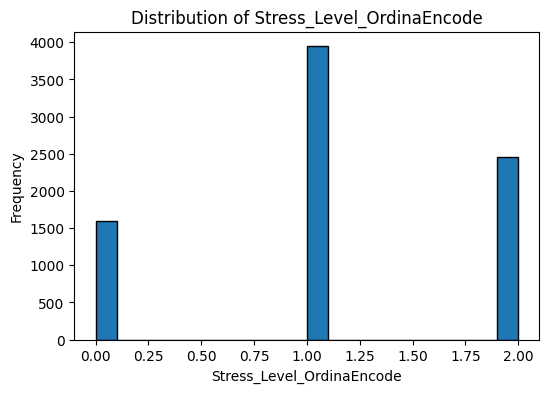

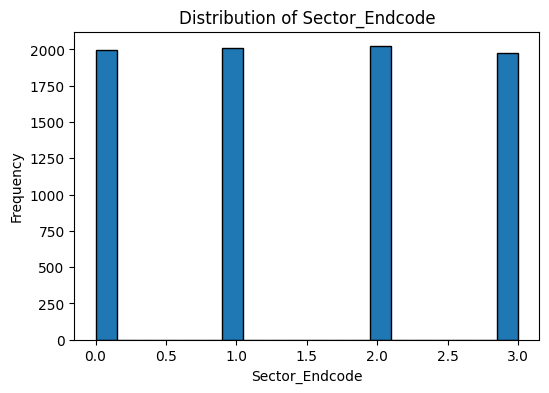

In [362]:
data_excludeObject = data_train.select_dtypes(exclude='object').columns

for column in data_excludeObject:
    plt.figure(figsize=(6, 4))  # Ukuran yang lebih kecil
    plt.hist(data_train[column], bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [363]:
data_train_converted = data_train_converted.drop('Affected_by_Covid',axis=1)

In [364]:
# Mengubah kolom biner menjadi deskripsi string dalam bahasa Indonesia
data_train_converted['Increased_Work_Hours'] = data_train_converted['Increased_Work_Hours'].apply(lambda x: 'Jam kerja meningkat' if x == 1 else 'Jam kerja tidak berubah atau menurun')
data_train_converted['Work_From_Home'] = data_train_converted['Work_From_Home'].apply(lambda x: 'Bekerja dari rumah' if x == 1 else 'Tidak bekerja dari rumah')
data_train_converted['Productivity_Change'] = data_train_converted['Productivity_Change'].apply(lambda x: 'Produktivitas berubah' if x == 1 else 'Produktivitas tidak berubah')
data_train_converted['Health_Issue'] = data_train_converted['Health_Issue'].apply(lambda x: 'Memiliki masalah kesehatan baru' if x == 1 else 'Tidak memiliki masalah kesehatan baru')
data_train_converted['Job_Security'] = data_train_converted['Job_Security'].apply(lambda x: 'Keamanan kerja menurun' if x == 1 else 'Keamanan kerja stabil')
data_train_converted['Childcare_Responsibilities'] = data_train_converted['Childcare_Responsibilities'].apply(lambda x: 'Tanggung jawab perawatan anak meningkat' if x == 1 else 'Tanggung jawab perawatan anak tidak berubah atau menurun')
data_train_converted['Commuting_Changes'] = data_train_converted['Commuting_Changes'].apply(lambda x: 'Perubahan pola bepergian' if x == 1 else 'Pola bepergian tidak berubah')
data_train_converted['Technology_Adaptation'] = data_train_converted['Technology_Adaptation'].apply(lambda x: 'Beradaptasi dengan teknologi baru' if x == 1 else 'Tidak perlu adaptasi teknologi baru')
data_train_converted['Salary_Changes'] = data_train_converted['Salary_Changes'].apply(lambda x: 'Perubahan gaji' if x == 1 else 'Gaji tidak berubah')
data_train_converted['Team_Collaboration_Challenges'] = data_train_converted['Team_Collaboration_Challenges'].apply(lambda x: 'Tantangan kolaborasi tim' if x == 1 else 'Tidak ada tantangan kolaborasi tim')

In [365]:
data_train_converted.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector
0,Jam kerja meningkat,Tidak bekerja dari rumah,Lembur,Rapat Sedang,Produktivitas tidak berubah,Low,Tidak memiliki masalah kesehatan baru,Keamanan kerja stabil,Tanggung jawab perawatan anak meningkat,Pola bepergian tidak berubah,Beradaptasi dengan teknologi baru,Gaji tidak berubah,Tidak ada tantangan kolaborasi tim,Education
1,Jam kerja tidak berubah atau menurun,Bekerja dari rumah,Lembur,Rapat Banyak,Produktivitas berubah,High,Tidak memiliki masalah kesehatan baru,Keamanan kerja menurun,Tanggung jawab perawatan anak tidak berubah atau menurun,Perubahan pola bepergian,Beradaptasi dengan teknologi baru,Gaji tidak berubah,Tidak ada tantangan kolaborasi tim,Education
2,Jam kerja meningkat,Bekerja dari rumah,Normal,Rapat Banyak,Produktivitas tidak berubah,High,Memiliki masalah kesehatan baru,Keamanan kerja stabil,Tanggung jawab perawatan anak meningkat,Perubahan pola bepergian,Beradaptasi dengan teknologi baru,Gaji tidak berubah,Tantangan kolaborasi tim,IT
3,Jam kerja tidak berubah atau menurun,Bekerja dari rumah,Normal,Rapat Sedang,Produktivitas tidak berubah,Medium,Memiliki masalah kesehatan baru,Keamanan kerja menurun,Tanggung jawab perawatan anak tidak berubah atau menurun,Pola bepergian tidak berubah,Tidak perlu adaptasi teknologi baru,Perubahan gaji,Tantangan kolaborasi tim,Education
4,Jam kerja tidak berubah atau menurun,Bekerja dari rumah,Lembur,Rapat Sedang,Produktivitas tidak berubah,Medium,Tidak memiliki masalah kesehatan baru,Keamanan kerja stabil,Tanggung jawab perawatan anak meningkat,Pola bepergian tidak berubah,Beradaptasi dengan teknologi baru,Gaji tidak berubah,Tantangan kolaborasi tim,Healthcare


In [366]:
# Mengubah semua kolom kategorikal menjadi bentuk one-hot encoding
data_onehotEncoding = pd.get_dummies(data_train_converted)

# Pastikan data berhasil dikonversi dengan benar
data_onehotEncoding['Salary_Changes_Perubahan gaji'].value_counts()

Salary_Changes_Perubahan gaji
False    6447
True     1553
Name: count, dtype: int64

In [367]:
data_train_converted.columns

Index(['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day',
       'Meetings_Per_Day', 'Productivity_Change', 'Stress_Level',
       'Health_Issue', 'Job_Security', 'Childcare_Responsibilities',
       'Commuting_Changes', 'Technology_Adaptation', 'Salary_Changes',
       'Team_Collaboration_Challenges', 'Sector'],
      dtype='object')

In [368]:
data_train_converted.isnull().sum()

Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Stress_Level                     0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Salary_Changes                   0
Team_Collaboration_Challenges    0
Sector                           0
dtype: int64

In [369]:
data_train_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Increased_Work_Hours           8000 non-null   object
 1   Work_From_Home                 8000 non-null   object
 2   Hours_Worked_Per_Day           8000 non-null   object
 3   Meetings_Per_Day               8000 non-null   object
 4   Productivity_Change            8000 non-null   object
 5   Stress_Level                   8000 non-null   object
 6   Health_Issue                   8000 non-null   object
 7   Job_Security                   8000 non-null   object
 8   Childcare_Responsibilities     8000 non-null   object
 9   Commuting_Changes              8000 non-null   object
 10  Technology_Adaptation          8000 non-null   object
 11  Salary_Changes                 8000 non-null   object
 12  Team_Collaboration_Challenges  8000 non-null   object
 13  Sec

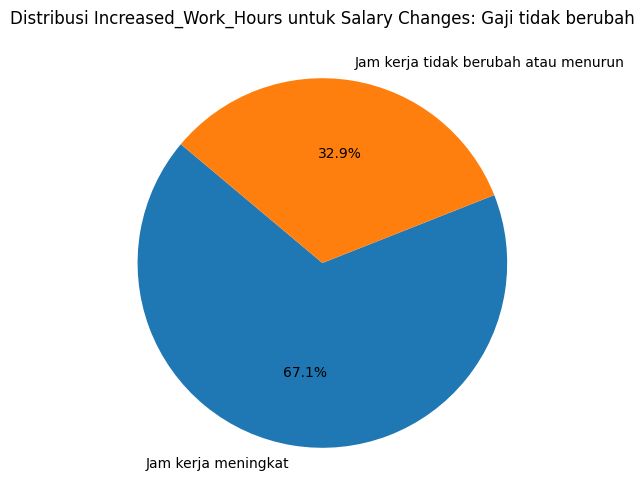

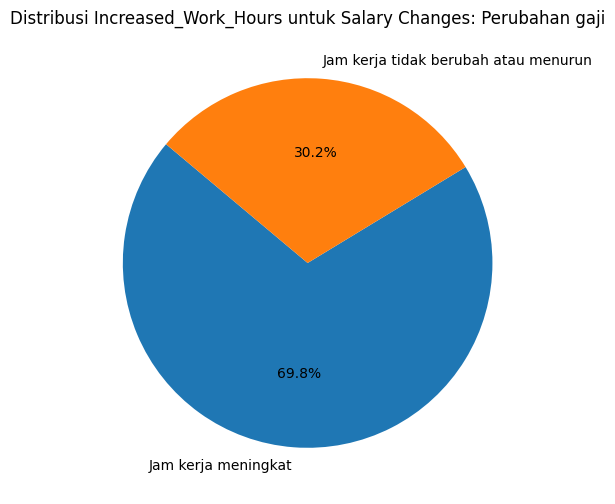

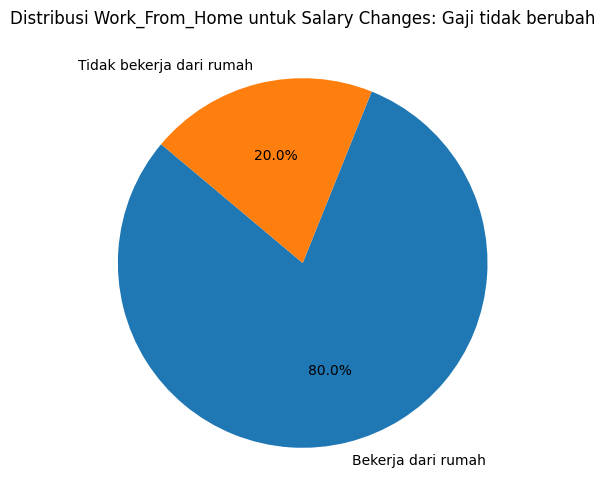

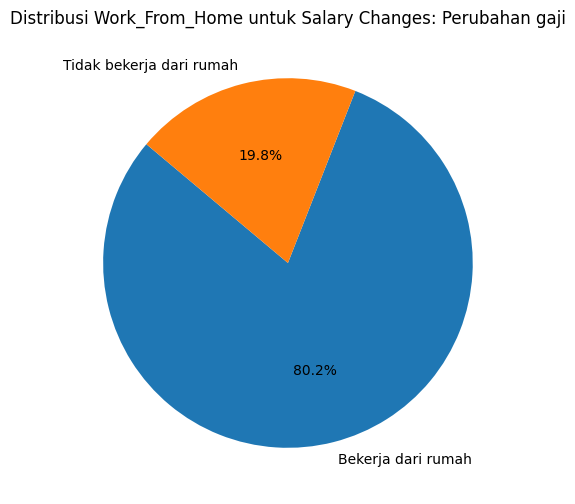

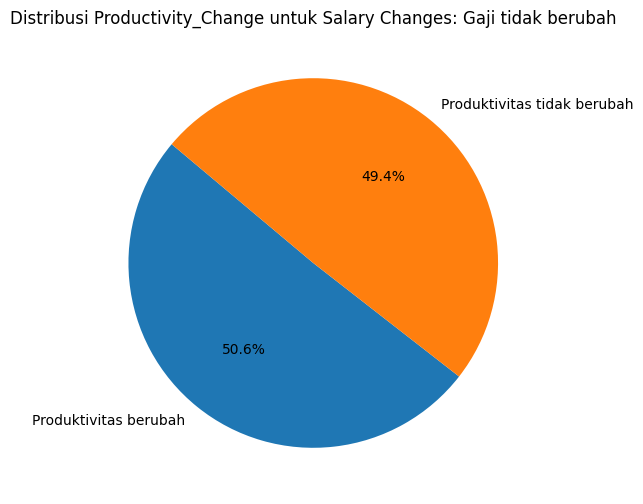

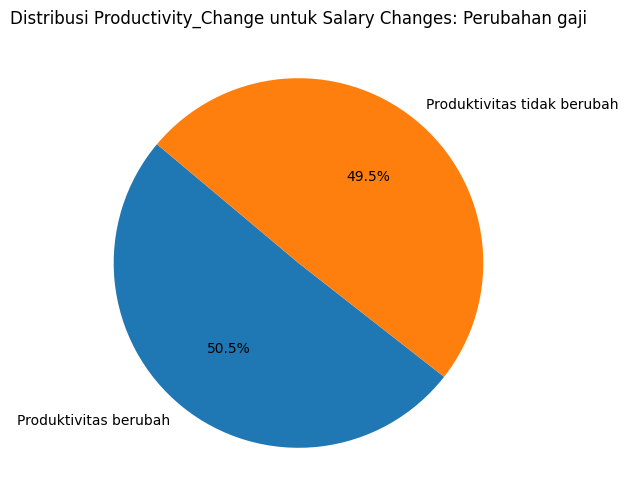

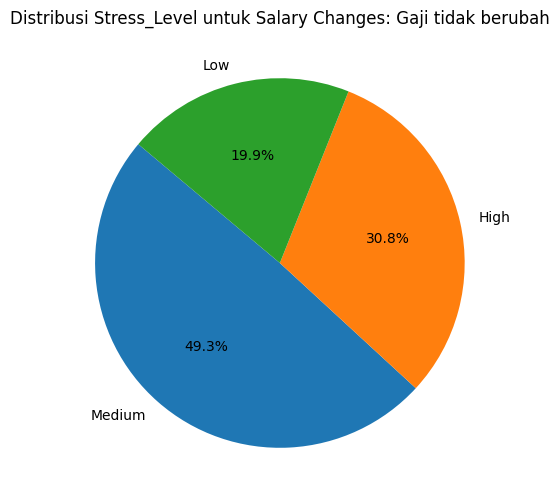

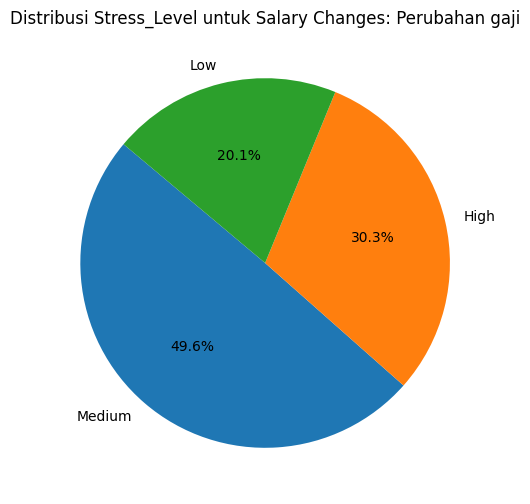

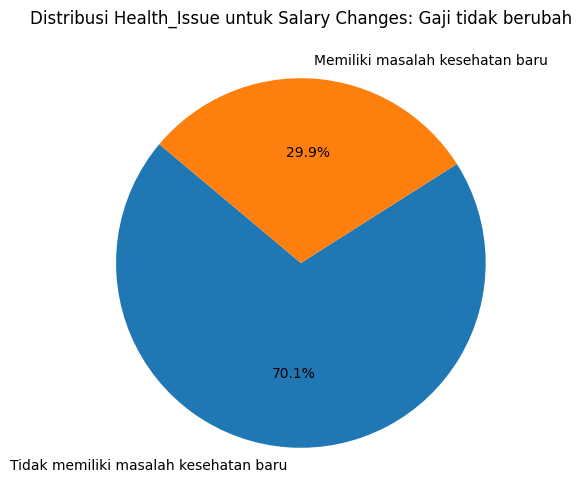

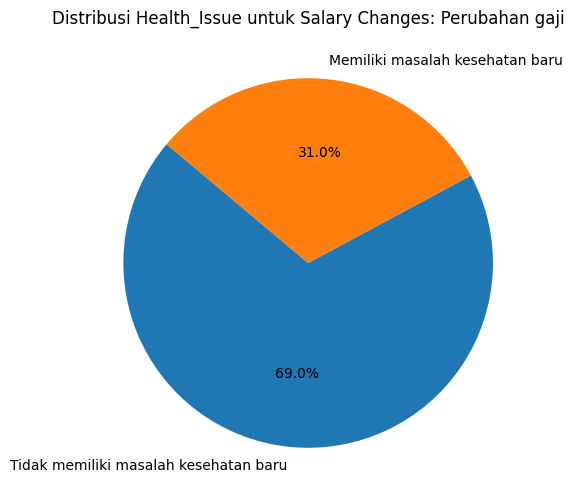

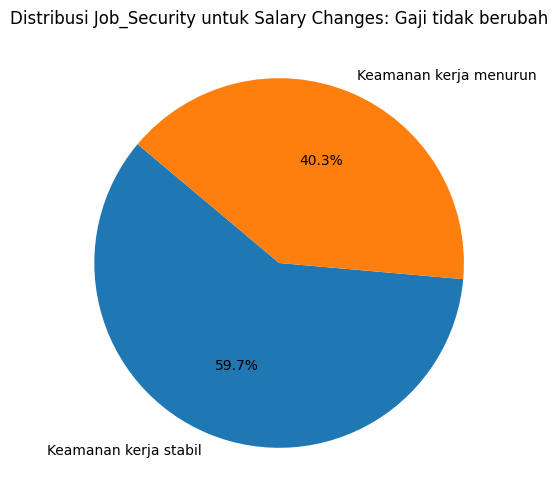

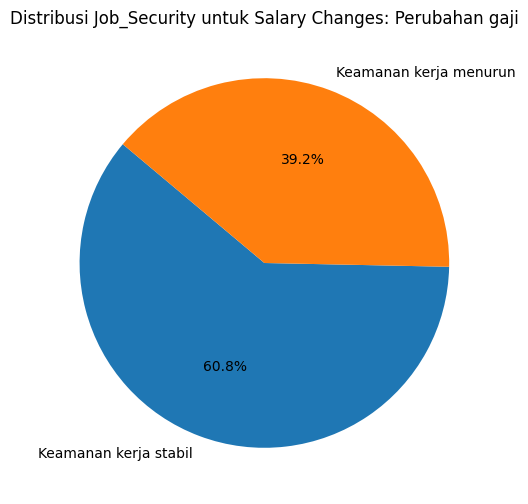

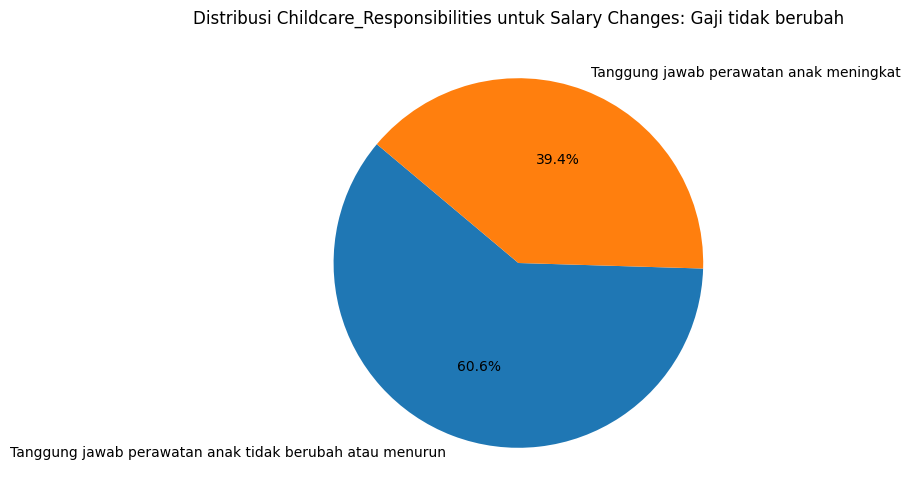

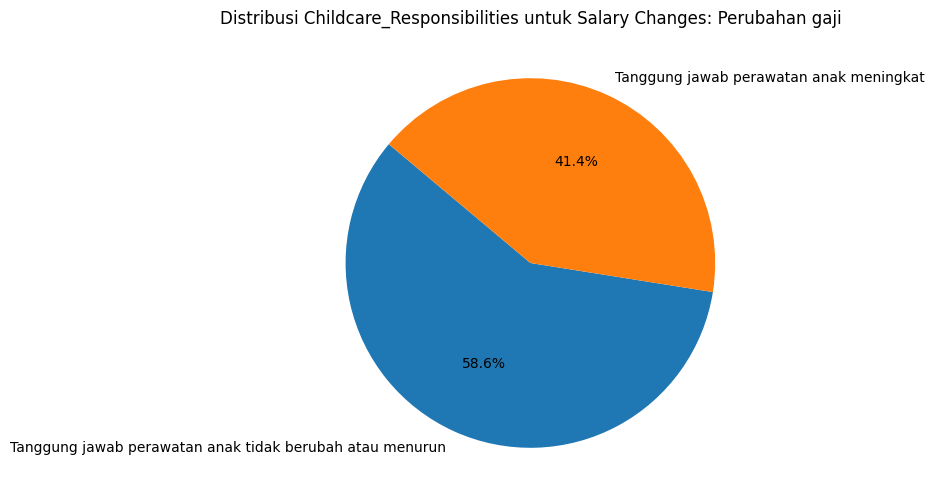

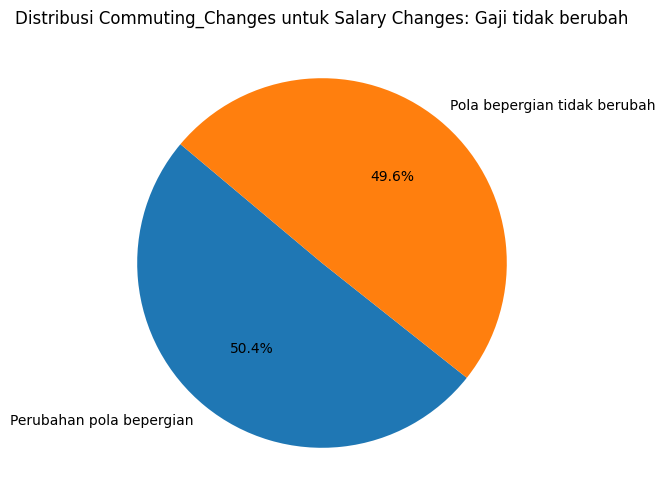

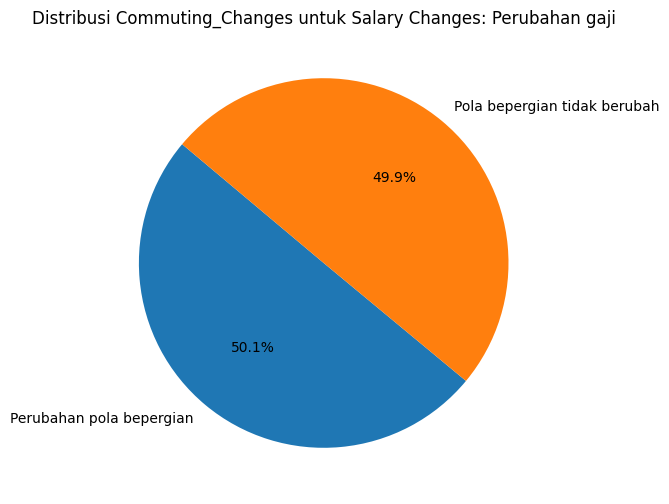

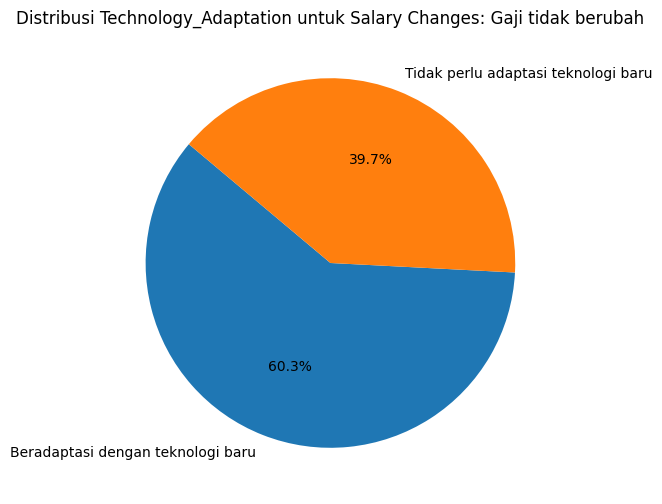

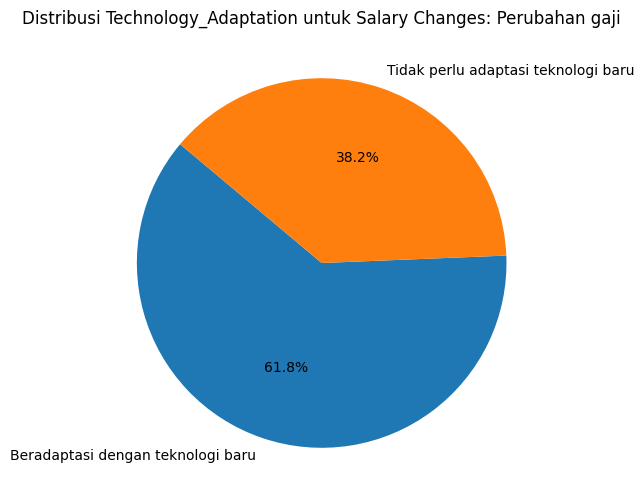

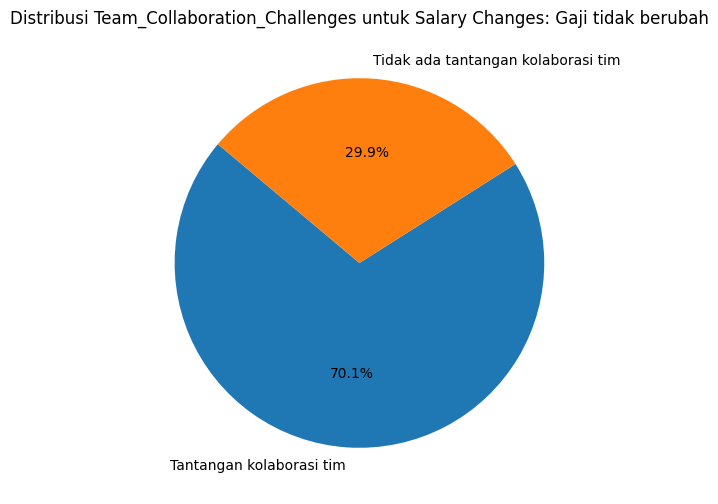

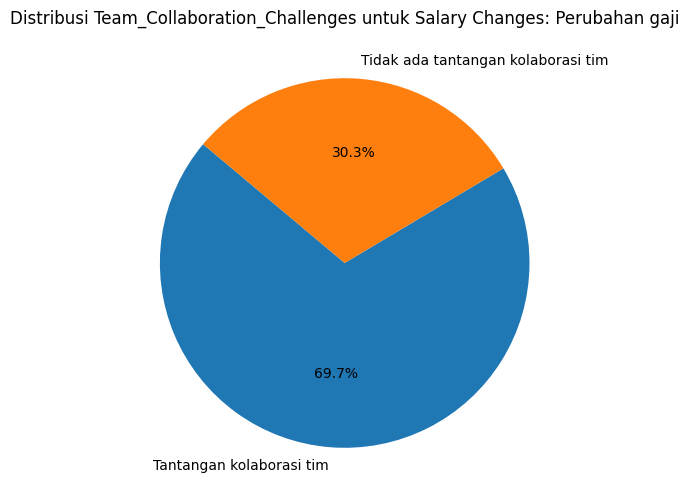

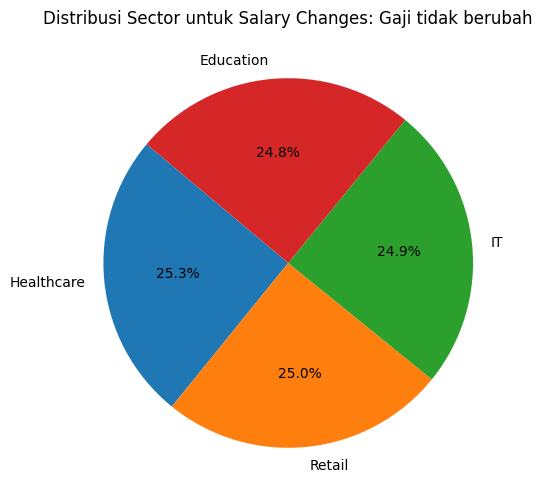

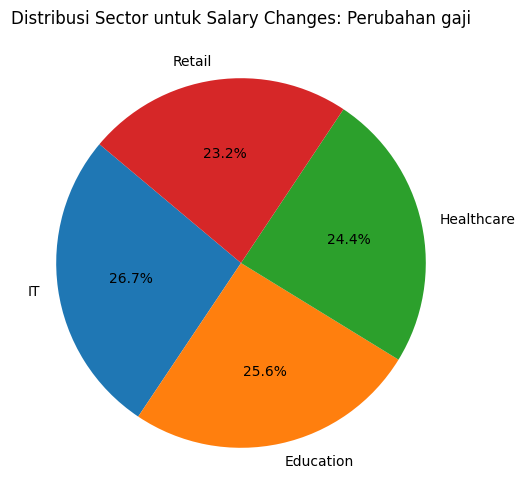

In [370]:
# Step 1: Mengelompokkan data berdasarkan 'Salary_Changes'
grouped_data = data_train_converted.groupby('Salary_Changes')

# Step 2: Daftar fitur untuk visualisasi
features_to_visualize = [
    'Increased_Work_Hours', 'Work_From_Home', 'Productivity_Change', 
    'Stress_Level', 'Health_Issue', 'Job_Security', 'Childcare_Responsibilities', 
    'Commuting_Changes', 'Technology_Adaptation', 'Team_Collaboration_Challenges', 'Sector'
]

# Step 3: Fungsi untuk membuat pie chart dari setiap fitur
def plot_pie_charts(feature):
    for group_name, group_data in grouped_data:
        plt.figure(figsize=(8, 6))
        plt.pie(group_data[feature].value_counts(), 
                labels=group_data[feature].value_counts().index, 
                autopct='%1.1f%%', startangle=140)
        plt.title(f"Distribusi {feature} untuk Salary Changes: {group_name}")
        plt.show()

# Step 4: Looping untuk membuat pie chart dari setiap fitur
for feature in features_to_visualize:
    plot_pie_charts(feature)


In [ ]:
# Set opsi tampilan pandas agar tabel tampil penuh
pd.set_option('display.max_columns', None)   # Menampilkan semua kolom
pd.set_option('display.max_rows', None)      # Menampilkan semua baris (jika dibutuhkan)
pd.set_option('display.max_colwidth', None)  # Menampilkan isi kolom yang panjang

# Jalankan apriori dan aturan asosiasi
frequent_itemsets = apriori(data_onehotEncoding, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold = 1)
rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# Filter aturan yang melibatkan fitur "Workout_Type"
filtered_rules = rules[
    rules['consequents'].astype(str).str.contains("Salary_Changes_Perubahan gaji")
]

# Tampilkan aturan asosiasi yang difilter dengan kolom penuh
filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
23,(Increased_Work_Hours_Jam kerja meningkat),(Salary_Changes_Perubahan gaji),0.135500,0.200370,1.032168
425,"(Work_From_Home_Bekerja dari rumah, Increased_Work_Hours_Jam kerja meningkat)",(Salary_Changes_Perubahan gaji),0.108375,0.199632,1.028366
335,(Technology_Adaptation_Beradaptasi dengan teknologi baru),(Salary_Changes_Perubahan gaji),0.119875,0.197895,1.019421
287,(Job_Security_Keamanan kerja stabil),(Salary_Changes_Perubahan gaji),0.118000,0.196913,1.014361
71,(Work_From_Home_Bekerja dari rumah),(Salary_Changes_Perubahan gaji),0.155625,0.194410,1.001467
427,(Increased_Work_Hours_Jam kerja meningkat),"(Salary_Changes_Perubahan gaji, Work_From_Home_Bekerja dari rumah)",0.108375,0.160259,1.029775
1871,(Team_Collaboration_Challenges_Tantangan kolaborasi tim),"(Salary_Changes_Perubahan gaji, Work_From_Home_Bekerja dari rumah)",0.109000,0.155659,1.000217
1870,(Work_From_Home_Bekerja dari rumah),"(Salary_Changes_Perubahan gaji, Team_Collaboration_Challenges_Tantangan kolaborasi tim)",0.109000,0.136165,1.006764
1643,(Work_From_Home_Bekerja dari rumah),"(Salary_Changes_Perubahan gaji, Health_Issue_Tidak memiliki masalah kesehatan baru)",0.107750,0.134603,1.005441


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Increased_Work_Hours                8000 non-null   int64  
 1   Work_From_Home                      8000 non-null   int64  
 2   Hours_Worked_Per_Day                8000 non-null   object 
 3   Meetings_Per_Day                    8000 non-null   object 
 4   Productivity_Change                 8000 non-null   int64  
 5   Stress_Level                        8000 non-null   object 
 6   Health_Issue                        8000 non-null   int64  
 7   Job_Security                        8000 non-null   int64  
 8   Childcare_Responsibilities          8000 non-null   int64  
 9   Commuting_Changes                   8000 non-null   int64  
 10  Technology_Adaptation               8000 non-null   int64  
 11  Salary_Changes                      8000 no

In [ ]:
fiturdrop = ['Sector','Meetings_Per_Day','Hours_Worked_Per_Day','Stress_Level']
data_train = data_train.drop(fiturdrop,axis=1)

In [ ]:
data_train.head()

,Increased_Work_Hours,Work_From_Home,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Affected_by_Covid,Meetings_Per_Day_OrdinalEncode,Hours_Worked_Per_Day_OrdinalEncode,Stress_Level_OrdinaEncode,Sector_Endcode
0,1,0,0,0,0,1,0,1,0,0,1,2.0,3.0,0.0,0
1,0,1,1,0,1,0,1,1,0,0,1,3.0,3.0,2.0,0
2,1,1,0,1,0,1,1,1,0,1,1,3.0,2.0,2.0,2
3,0,1,0,1,1,0,0,0,1,1,1,2.0,2.0,1.0,0
4,0,1,0,0,0,1,0,1,0,1,1,2.0,3.0,1.0,1


# Lakukan Prepocesing Yang Sama Pada Data Test

In [ ]:
def categorize_work_hours(hours):
    if hours <= 4:
        return "Sangat Pendek"
    elif hours <= 6:
        return "Pendek"
    elif hours <= 8:
        return "Normal"
    elif hours <= 12:
        return "Lembur"
    else:
        return "Sangat Lama"

# Terapkan fungsi pada kolom
data_test['Hours_Worked_Per_Day'] = data_test['Hours_Worked_Per_Day'].apply(categorize_work_hours)

# Fungsi untuk membuat kategori
def categorize_meetings(meetings):
    if meetings <= 0:
        return "Tidak Ada Rapat"
    elif meetings <= 2:
        return "Rapat Sedikit"
    elif meetings <= 5:
        return "Rapat Sedang"
    elif meetings <= 8:
        return "Rapat Banyak"
    else:
        return "Rapat Sangat Banyak"

# Terapkan fungsi pada kolom
data_test['Meetings_Per_Day'] = data_test['Meetings_Per_Day'].apply(categorize_meetings)


In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[['Tidak Ada Rapat','Rapat Sedikit', 'Rapat Sedang', 'Rapat Banyak', 'Rapat Sangat Banyak']])
data_test['Meetings_Per_Day_OrdinalEncode'] = ordinal_encoder.fit_transform(data_test[['Meetings_Per_Day']])

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[['Sangat Pendek', 'Pendek', 'Normal','Lembur','Sangat Lama']])
data_test['Hours_Worked_Per_Day_OrdinalEncode'] = ordinal_encoder.fit_transform(data_test[['Hours_Worked_Per_Day']])

In [ ]:
# Assuming 'Stress_Level' is the column you want to encode
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
data_test['Stress_Level_OrdinaEncode'] = ordinal_encoder.fit_transform(data_test[['Stress_Level']])

In [ ]:
label_encoder = LabelEncoder()

# Fit dan transform kolom 'Sector'
data_test['Sector_Endcode'] = label_encoder.fit_transform(data_test['Sector'])

In [ ]:
data_test = data_test.drop(fiturdrop,axis=1)

In [ ]:
data_test.head()

,id,Increased_Work_Hours,Work_From_Home,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Team_Collaboration_Challenges,Affected_by_Covid,Meetings_Per_Day_OrdinalEncode,Hours_Worked_Per_Day_OrdinalEncode,Stress_Level_OrdinaEncode,Sector_Endcode
0,0,1,0,0,0,0,0,0,0,1,1,3.0,1.0,1.0,0
1,1,1,1,0,0,1,1,0,1,1,1,2.0,2.0,1.0,3
2,2,1,1,1,0,0,0,0,1,0,1,3.0,3.0,1.0,3
3,3,0,1,0,1,0,0,0,1,1,1,2.0,2.0,1.0,0
4,4,1,1,0,1,0,0,0,1,0,1,2.0,3.0,1.0,0


In [ ]:
data_test = data_test.drop('id', axis=1)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression #tandain dlu ini yang paling gacor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = data_train.drop(columns=['Salary_Changes'], axis=1)  # Replace 'target' with your actual target column name
y = data_train['Salary_Changes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

# List of models to test
models = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNeighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(learning_rate=0.1, iterations=500, depth=6, verbose=0)
}


# Melatih dan mengevaluasi setiap model
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    
    # Melatih model
    model.fit(X_train, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Evaluasi hasil
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}")
    print("-" * 50)



Evaluating model: Random Forest
Accuracy for Random Forest: 0.77375
--------------------------------------------------
Evaluating model: AdaBoost
Accuracy for AdaBoost: 0.81
--------------------------------------------------
Evaluating model: SVM
Accuracy for SVM: 0.81
--------------------------------------------------
Evaluating model: Logistic Regression
Accuracy for Logistic Regression: 0.81
--------------------------------------------------
Evaluating model: Decision Tree
Accuracy for Decision Tree: 0.703125
--------------------------------------------------
Evaluating model: Naive Bayes
Accuracy for Naive Bayes: 0.81
--------------------------------------------------
Evaluating model: KNeighbors
Accuracy for KNeighbors: 0.7775
--------------------------------------------------
Evaluating model: XGBoost
Accuracy for XGBoost: 0.78875
--------------------------------------------------
Evaluating model: CatBoost
Accuracy for CatBoost: 0.79125
------------------------------------------

In [ ]:
'''from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

class_weights = {0: 1, 1: 6447 / 1553}

# Inisiasi model AdaBoost dengan classifier dasar DecisionTreeClassifier
# DecisionTreeClassifier dipilih karena dapat menangani ketidakseimbangan kelas dengan baik.
# Gunakan algoritma 'SAMME' untuk menghindari peringatan terkait 'SAMME.R'
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight=class_weights), 
                           algorithm='SAMME', random_state=42)

# Fit model ke data training
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred, zero_division=0))
'''

"from sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import classification_report\n\nclass_weights = {0: 1, 1: 6447 / 1553}\n\n# Inisiasi model AdaBoost dengan classifier dasar DecisionTreeClassifier\n# DecisionTreeClassifier dipilih karena dapat menangani ketidakseimbangan kelas dengan baik.\n# Gunakan algoritma 'SAMME' untuk menghindari peringatan terkait 'SAMME.R'\nmodel = AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight=class_weights), \n                           algorithm='SAMME', random_state=42)\n\n# Fit model ke data training\nmodel.fit(X_train, y_train)\n\n# Prediksi dan evaluasi\ny_pred = model.predict(X_test)\n\n# Evaluasi hasil\nprint(classification_report(y_test, y_pred, zero_division=0))\n"

In [ ]:
y_pred = model.predict(data_test)
pred = model.predict(data_test)

In [ ]:
pred_labels = pd.Series(pred) 

In [ ]:
pred_labels.value_counts()

0    2000
Name: count, dtype: int64

In [ ]:
data_test = pd.read_csv("/Users/erwinqodariyah/Documents/SEMESTER_3/Data Mining/praktikum-2-data-mining-rka/test.csv")
submission = pd.DataFrame({
    "id": data_test["id"],
    "Salary_Changes": pred_labels
})
submission.head()

,id,Salary_Changes
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
submission.to_csv('submitdatminpraktium2_5.csv', index=False)